In [1]:
import random
from deap import base, creator, tools, algorithms

# Definição do problema
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Inicialização de parâmetros
IND_SIZE = 20  # Tamanho do indivíduo (sequência binária)

# Função de criação de indivíduos
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Função de avaliação (fitness)
def evaluate(individual):
    return sum(individual),

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)  # Operador de crossover
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)  # Operador de mutação
toolbox.register("select", tools.selTournament, tournsize=3)  # Operador de seleção

def main():
    # Inicialização da população e parâmetros adicionais
    pop = toolbox.population(n=50)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 40

    print("Iniciando a evolução...")

    # Avaliação inicial da população
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    # Evolução da população
    for g in range(NGEN):
        print(f"--- Geração {g + 1} ---")

        # Seleção dos indivíduos para reprodução
        offspring = toolbox.select(pop, len(pop))

        # Clonagem dos indivíduos selecionados
        offspring = list(map(toolbox.clone, offspring))

        # Aplicação do crossover e mutação nos filhos gerados
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Avaliação dos indivíduos mutados e cruzados
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Substituição da população antiga pela nova
        pop[:] = offspring

        # Coleta de estatísticas
        fits = [ind.fitness.values[0] for ind in pop]
        length = len(pop)
        mean = sum(fits) / length
        max_val = max(fits)
        print(f"Média: {mean:.2f}, Máximo: {max_val}")

    print("Evolução concluída!")

    best_ind = tools.selBest(pop, 1)[0]
    print(f"Melhor indivíduo: {best_ind}, Fitness: {best_ind.fitness.values[0]}")

if __name__ == "__main__":
    main()


Iniciando a evolução...
--- Geração 1 ---
Média: 11.20, Máximo: 15.0
--- Geração 2 ---
Média: 12.66, Máximo: 15.0
--- Geração 3 ---
Média: 13.64, Máximo: 16.0
--- Geração 4 ---
Média: 14.60, Máximo: 18.0
--- Geração 5 ---
Média: 15.36, Máximo: 19.0
--- Geração 6 ---
Média: 16.36, Máximo: 19.0
--- Geração 7 ---
Média: 17.44, Máximo: 19.0
--- Geração 8 ---
Média: 18.08, Máximo: 19.0
--- Geração 9 ---
Média: 18.54, Máximo: 20.0
--- Geração 10 ---
Média: 18.94, Máximo: 20.0
--- Geração 11 ---
Média: 19.20, Máximo: 20.0
--- Geração 12 ---
Média: 19.62, Máximo: 20.0
--- Geração 13 ---
Média: 19.78, Máximo: 20.0
--- Geração 14 ---
Média: 19.68, Máximo: 20.0
--- Geração 15 ---
Média: 19.74, Máximo: 20.0
--- Geração 16 ---
Média: 19.80, Máximo: 20.0
--- Geração 17 ---
Média: 19.92, Máximo: 20.0
--- Geração 18 ---
Média: 19.86, Máximo: 20.0
--- Geração 19 ---
Média: 19.78, Máximo: 20.0
--- Geração 20 ---
Média: 19.86, Máximo: 20.0
--- Geração 21 ---
Média: 19.68, Máximo: 20.0
--- Geração 22 ---


In [8]:
import random
import string
from deap import base, creator, tools, algorithms

# Definição do problema
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Definindo a senha que queremos encontrar
TARGET_PASSWORD = "star"  # Altere para a senha desejada

# Função para criar indivíduos (possíveis senhas)
def create_individual():
    return [random.choice(string.ascii_letters + string.digits) for _ in range(len(TARGET_PASSWORD))]

# Função para avaliar a aptidão (fitness) do indivíduo em relação à senha alvo
def evaluate(individual):
    return sum(1 for i, j in zip(individual, TARGET_PASSWORD) if i == j),

toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)  # Operador de crossover
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)  # Operador de mutação
toolbox.register("select", tools.selTournament, tournsize=3)  # Operador de seleção

def main():
    pop = toolbox.population(n=100)
    CXPB, MUTPB, NGEN = 0.8, 0.2, 2000

    print("Iniciando a evolução para encontrar a senha...")

    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    for g in range(NGEN):
        print(f"--- Geração {g + 1} ---")

        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        pop[:] = offspring

        fits = [ind.fitness.values[0] for ind in pop]
        length = len(pop)
        mean = sum(fits) / length
        max_val = max(fits)
        print(f"Média: {mean:.2f}, Máximo: {max_val}")

        if max_val == len(TARGET_PASSWORD):
            print("Senha encontrada na geração", g + 1)
            break

    best_ind = tools.selBest(pop, 1)[0]
    print(f"Melhor indivíduo: {''.join(best_ind)}, Fitness: {best_ind.fitness.values[0]}")

if __name__ == "__main__":
    main()


Iniciando a evolução para encontrar a senha...
--- Geração 1 ---
Média: 0.27, Máximo: 1.0
--- Geração 2 ---
Média: 0.48, Máximo: 2.0
--- Geração 3 ---
Média: 0.76, Máximo: 2.0
--- Geração 4 ---
Média: 1.19, Máximo: 3.0
--- Geração 5 ---
Média: 1.51, Máximo: 3.0
--- Geração 6 ---
Média: 1.73, Máximo: 3.0
--- Geração 7 ---
Média: 2.20, Máximo: 3.0
--- Geração 8 ---
Média: 2.46, Máximo: 3.0
--- Geração 9 ---
Média: 2.72, Máximo: 3.0
--- Geração 10 ---
Média: 2.70, Máximo: 3.0
--- Geração 11 ---
Média: 2.36, Máximo: 3.0
--- Geração 12 ---
Média: 2.40, Máximo: 3.0
--- Geração 13 ---
Média: 2.77, Máximo: 3.0
--- Geração 14 ---
Média: 2.52, Máximo: 3.0
--- Geração 15 ---
Média: 2.63, Máximo: 3.0
--- Geração 16 ---
Média: 2.68, Máximo: 3.0
--- Geração 17 ---
Média: 2.66, Máximo: 3.0
--- Geração 18 ---
Média: 2.59, Máximo: 3.0
--- Geração 19 ---
Média: 2.68, Máximo: 3.0
--- Geração 20 ---
Média: 2.73, Máximo: 3.0
--- Geração 21 ---
Média: 2.45, Máximo: 3.0
--- Geração 22 ---
Média: 2.59, Máximo

Iniciando a evolução para o Problema do Caixeiro Viajante...

Evolução concluída.
Melhor rota encontrada: [5, 4, 7, 1, 0, 3, 6, 9, 8, 2]
Distância da melhor rota: 2.415898884845726


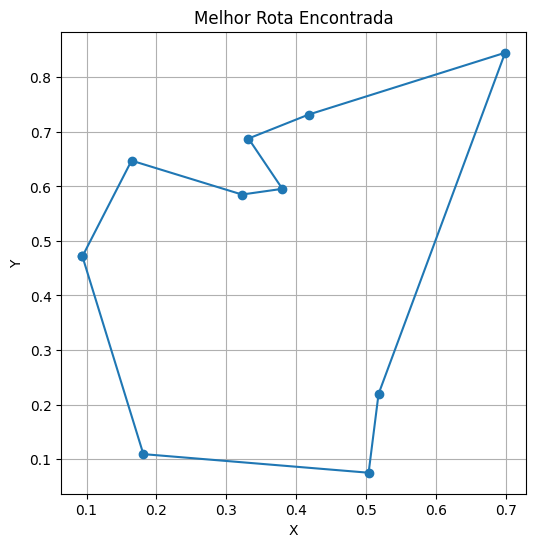

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Definição do problema
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Número de cidades
NUM_CITIES = 10
# Gerando cidades com coordenadas aleatórias em um espaço bidimensional
cities = {i: (random.random(), random.random()) for i in range(NUM_CITIES)}

# Calculando a matriz de distâncias entre as cidades
distances = np.zeros((NUM_CITIES, NUM_CITIES))
for i in range(NUM_CITIES):
    for j in range(NUM_CITIES):
        if i != j:
            distances[i][j] = np.linalg.norm(np.array(cities[i]) - np.array(cities[j]))

# Função de avaliação - Função de distância total do percurso (fitness)
def evaluate(individual):
    distance = 0.0
    for i in range(len(individual) - 1):
        distance += distances[individual[i]][individual[i + 1]]
    distance += distances[individual[-1]][individual[0]]  # Retorno para a cidade inicial
    return distance,

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(NUM_CITIES), NUM_CITIES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxOrdered)  # Operador de crossover (Ordered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Operador de mutação (ShuffleIndexes)
toolbox.register("select", tools.selTournament, tournsize=3)  # Operador de seleção (Torneio)

def main():
    pop = toolbox.population(n=50)
    CXPB, MUTPB, NGEN = 0.7, 0.2, 300

    print("Iniciando a evolução para o Problema do Caixeiro Viajante...")

    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    for g in range(NGEN):
        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        pop[:] = offspring

    best_ind = tools.selBest(pop, 1)[0]
    print("\nEvolução concluída.")
    print(f"Melhor rota encontrada: {best_ind}")
    print(f"Distância da melhor rota: {best_ind.fitness.values[0]}")

    # Plotagem da melhor rota
    x = [cities[i][0] for i in best_ind] + [cities[best_ind[0]][0]]
    y = [cities[i][1] for i in best_ind] + [cities[best_ind[0]][1]]
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, marker='o', linestyle='-')
    plt.title('Melhor Rota Encontrada')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main() 
